### New Import

In [1]:
!pip install git+https://github.com/cubecloud/fool_game.git@feature-02-np-exp
# !git clone --branch='feature-02-np-exp'  https://github.com/cubecloud/fool_game.git
# !pip install /content/fool_game/

  Cloning https://github.com/cubecloud/fool_game.git (to revision feature-02-np-exp) to /tmp/pip-req-build-xel7k9y4
  Running command git clone -q https://github.com/cubecloud/fool_game.git /tmp/pip-req-build-xel7k9y4
  Running command git checkout -b feature-02-np-exp --track origin/feature-02-np-exp
  Switched to a new branch 'feature-02-np-exp'
  Branch 'feature-02-np-exp' set up to track remote branch 'feature-02-np-exp' from 'origin'.
  Created wheel for fool-game: filename=fool_game-0.0.67-cp37-none-any.whl size=22421 sha256=6d52dc12919e5f4681a1ff41cf82a8a9deefb86fb391906d16c8da33111aef2b
  Stored in directory: /tmp/pip-ephem-wheel-cache-q6wvbzhc/wheels/8f/3d/c8/ca35378aa7396c2a96c1c7ff84439121e8a8de5ab1c26111f5
Successfully built fool-game


In [2]:
!git clone --branch='feature-02-np-exp'  https://github.com/cubecloud/fool_game.git
!pip install /content/fool_game/

Cloning into 'fool_game'...
remote: Enumerating objects: 177, done.
remote: Counting objects: 100% (177/177), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 177 (delta 87), reused 125 (delta 41), pack-reused 0
Receiving objects: 100% (177/177), 1.26 MiB | 8.71 MiB/s, done.
Resolving deltas: 100% (87/87), done.
Processing ./fool_game
  Created wheel for fool-game: filename=fool_game-0.0.65-cp37-none-any.whl size=22420 sha256=112b8adc4864333198ea6b841ad48438f9245011880b745271268e4a54d47c98
  Stored in directory: /tmp/pip-ephem-wheel-cache-mhvh6_wd/wheels/67/53/a2/3a86003955a41517f75b430127d417ceb92098d8ca7c61f5f2
Successfully built fool-game
  Found existing installation: fool-game 0.0.65
    Uninstalling fool-game-0.0.65:
      Successfully uninstalled fool-game-0.0.65


In [18]:
# adding terra_ai location for using googlesync 
# for development on local drive and testing 
# in google colab or jupyter notebook 
# change this variables to your locations for development
local_drive = '/home/cubecloud/GDrive'
remote_drive = '/content'
local_dev = '/Python/fool_game/'
remote_dev = '/terra_ai'
__demo_version__ = 0.04
import sys
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
#     from google.colab import drive
#     drive.mount('/content/drive')
    DEV = f'{remote_drive}{remote_dev}'
    DRIVE = remote_drive
elif 'ipykernel' in str(get_ipython()):
    print('Running on Jupyter Notebook')
    DEV = f'{local_drive}{local_dev}'
    DRIVE = local_drive
else:
    sys.exit('Not running on CoLab or Jupyter notebook')
print(f'Adding sys path: {DEV}')
sys.path.append(DEV)
HOME = f'{DEV}data/'

#check environment 

import tensorflow
print('Checking key environment depenndecies')
!python --version
print('TensorFlow', tensorflow.__version__)
print('Keras', tensorflow.keras.__version__)


Running on Jupyter Notebook
Adding sys path: /home/cubecloud/GDrive/Python/fool_game/
Checking key environment depenndecies
Python 3.7.7
TensorFlow 2.3.0
Keras 2.4.0


In [19]:
# import collections

import numpy as np # импортируем библиотеку для работы с массивами данных
import tensorflow as tf
# from tensorflow.keras.models import Model, load_model 
# from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense, Flatten, Input, Lambda, Conv2D, MaxPooling2D, Reshape, Multiply # из кераса загружаем необходимые слои для нейросети
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.optimizers import RMSprop, Adam, SGD, RMSprop# из кераса загружаем выбранный оптимизатор
import time                                # модуль для операций со временными характеристиками
import matplotlib.pyplot as plt            # импортируем библиотеку для визуализации данных
import seaborn as sns
import matplotlib
import pandas as pd
import pickle as pkl
import sys
import os
from datetime import datetime, timedelta
from IPython.display import clear_output 

import pytz
timezone = pytz.timezone("Europe/Moscow")
# # "магическая" команда python для запуска библиотеки в ноутбуке
# %matplotlib inline

# HOME = f'/content/drive/MyDrive/Python/fool_game/data/'
# from google.colab import drive
# drive.mount('/content/drive')

from importlib import reload
from cardgames import foolgame
foolgame = reload(foolgame)
print(tf.__version__)
print(tf.keras.__version__)
print(foolgame.__version__)

2.3.0
2.4.0
0.0.81


### Figshow

In [20]:
def figshow(df):
    fig = plt.figure(figsize=(26, 7))
    sns.set_style("white")
    ax1 = fig.add_subplot(1, 2, 1)
    ax1.set_axisbelow(True)
    ax1.minorticks_on()
    ax1.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
    ax1.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    # last_game = int(df["game"].max())
    # N = np.arange(0, last_game+1)

    plt.plot(df["game_episode"], df["loss"], linestyle='--', color='blue', label="loss")
    plt.plot(df["game_episode"], df["epsilon"], linestyle='--', color='green', label="epsilon")
    plt.title(f"Loss & epsilon")
    plt.legend()

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.set_axisbelow(True)
    ax2.minorticks_on()
    ax2.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
    ax2.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    plt.plot(df["game_episode"], df['mean_reward'], linestyle='-', color='red', label="best_mean_reward")
    plt.plot(df["game_episode"], df["time"]/10, linestyle='--', color='green', label="time/10")
    plt.title(f"mean_reward & time/10")
    plt.legend()
    plt.show()
    pass

In [12]:
!nvidia-smi

Wed Apr 28 23:40:18 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.119.03   Driver Version: 450.119.03   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 760     Off  | 00000000:01:00.0 N/A |                  N/A |
| 34%   48C    P0    N/A /  N/A |    712MiB /  1998MiB |     N/A      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
games_num = 100000
players_num = 4
game_table = foolgame.Environment(players_num, games_num)
model = foolgame.q_model()
model_target = foolgame.q_model()

In [24]:
MEAN_REWARD_BOUND = 12.0           

gamma = 0.99                                   
batch_size = 32                 # at epoch = 1000
replay_size = 10000                
       
sync_target_turns = 1000       # at epoch = 1000 changed from 2000 to 3000
replay_start_size = 10000      
eps_start = 1.0
eps_decay = .999985             #changed start from .999985
eps_min = 0.02                  # changed from 0.02 to 0.07 and at epoch=1000 to 0.1
buffer = game_table.replay_buffer

In [25]:
model_weights_save_name = 'fool_cardgame_weights'
history_csv_name = 'fool_cardgame_hst.csv'
exp_pkl_name = 'fool_cardgame_exp.pkl'
cols = ['game_episode',
        'turns',  
        'time', 
        'loss',
        'epsilon',
        'mean_reward',
       ]

def get_pd_data(pdfile):
  df_data = pd.read_csv(os.path.join(HOME, pdfile), index_col=0)
  return df_data

def add_data_to_pd(df_data, _game_episode, _turns, _time, _loss, _epsilon, _mean_reward):
  df_data = df_data.append({'game_episode': _game_episode,
                            'turns': _turns,
                            'time': _time,
                            'loss': _loss,
                            'epsilon': _epsilon,
                            'mean_reward': _mean_reward,
                            }, ignore_index=True)
  # print(self.df.to_string())
  return df_data
  
def load_checkpoint(save_name):
    pd_file_path =  os.path.join(HOME, history_csv_name)
    if os.path.exists(pd_file_path):    
      df = get_pd_data(pd_file_path)
      pd_start_game= int(df.game_episode.max())
    else:
      pd_start_game = 0
      df = pd.DataFrame(columns=cols)
    start_game = 0
    mean_reward = 0
    dirlist = os.listdir(HOME)
    for i in range (len(dirlist)):
      filename = dirlist[i]
      if save_name in filename:
        if '_' in filename: 
          try: 
            epoch = int((filename.split('_')[-1]).split('.')[-2])
          except ValueError:
            epoch = 0
          if epoch > start_game:
            start_game = epoch
    if pd_start_game > start_game:
      df.drop(index = [i for i in range(start_game+1, pd_start_game+1)], axis=0, inplace=True)
      # df.to_csv(os.path.join(HOME, history_csv_name), encoding='utf-8')
    if start_game > 0:
      file_path = os.path.join(HOME, f'{save_name}_{start_game}.h5')
      model.load_weights(file_path)
      model_target.load_weights(file_path)
      print(f"Loaded {file_path} save, for model & model_target. Starting training from {start_game}")
      # last epoch +1
      epsilon = float(df.loc[(df["game_episode"]==start_game), "epsilon"].item())
      mean_reward = float(df.loc[(df["game_episode"]==start_game), "mean_reward"].item())
    else:
      epsilon = 1.0
      print(f"Starting from scratches. Starting game = {start_game}")
    return df, start_game, epsilon, mean_reward

df, start_game, epsilon, mean_reward = load_checkpoint(model_weights_save_name)

if start_game != 0:
  turn_idx = int(df.turns.max())
  figshow(df)
  game_episode = start_game
  total_rewards = []
  total_rewards = df.loc[(df["game_episode"]<=start_game) &(df["game_episode"]>=start_game-100), "mean_reward"].values.tolist()
  # epsilon = 0.1
  learning_rate = 1e-4
  adam_hat = 1e-8
  if game_episode > 200:
    lr_decay = 60/game_episode
    learning_rate = learning_rate * lr_decay
    if learning_rate < adam_hat:
      learning_rate = adam_hat
else:
  turn_idx = 0
  mean_reward = 0
  game_episode = -1
  epsilon = eps_start
  total_rewards = []
  learning_rate = 1e-4  

print(df.tail(15).to_string())
print(f'Start game episode:', start_game)
print('Turn index:', turn_idx)
print('Epsilon:', epsilon)
print('Learning rate:', learning_rate)
print('Mean reward on last game episode:', mean_reward)
print(f'_mean_ of Total rewards for last 100 games: {np.mean(total_rewards[-100:]) if total_rewards else None}')

exp_file_path = os.path.join(HOME, f'{exp_pkl_name}')
if start_game != 0:
  if os.path.exists(exp_file_path):
    buffer.load(exp_file_path)
  else:
    msg = f"Warning: pickle Exp file not found, starting without" 
    print(msg)

time_sum = int(df["time"].sum())
print(f'Model learning {start_game} games and {timedelta(seconds=time_sum)}')

Starting from scratches. Starting game = 0
Empty DataFrame
Columns: [game_episode, turns, time, loss, epsilon, mean_reward]
Index: []
Start game episode: 0
Turn index: 0
Epsilon: 1.0
Learning rate: 0.0001
Mean reward on last game episode: 0
_mean_ of Total rewards for last 100 games: None
Model learning 0 games and 0:00:00


      game_episode     turns      time      loss   epsilon  mean_reward
2951        2951.0  129155.0  0.101485  0.276763  0.956686     0.321750
2952        2952.0  129210.0  0.105813  0.040833  0.956671     0.321750
2953        2953.0  129251.0  0.094624  0.891083  0.956657     0.321750
2954        2954.0  129301.0  0.103400  0.048868  0.956643     0.321750
2955        2955.0  129339.0  0.094213  0.040302  0.956628     0.321750
2956        2956.0  129388.0  0.097410  0.619988  0.956614     0.321750
2957        2957.0  129423.0  0.091127  0.028887  0.956600     0.321750
2958        2958.0  129458.0  0.091739  0.260400  0.956585     0.321750
2959        2959.0  129529.0  0.121497  0.032731  0.956571     0.321750
2960        2960.0  129572.0  0.092275  0.032369  0.956557     0.321750
2961        2961.0  129613.0  0.090736  0.391607  0.956542     0.321750
2962        2962.0  129671.0  0.104646  0.032829  0.956528     0.321750
2963        2963.0  129727.0  0.096892  0.042343  0.956514     0

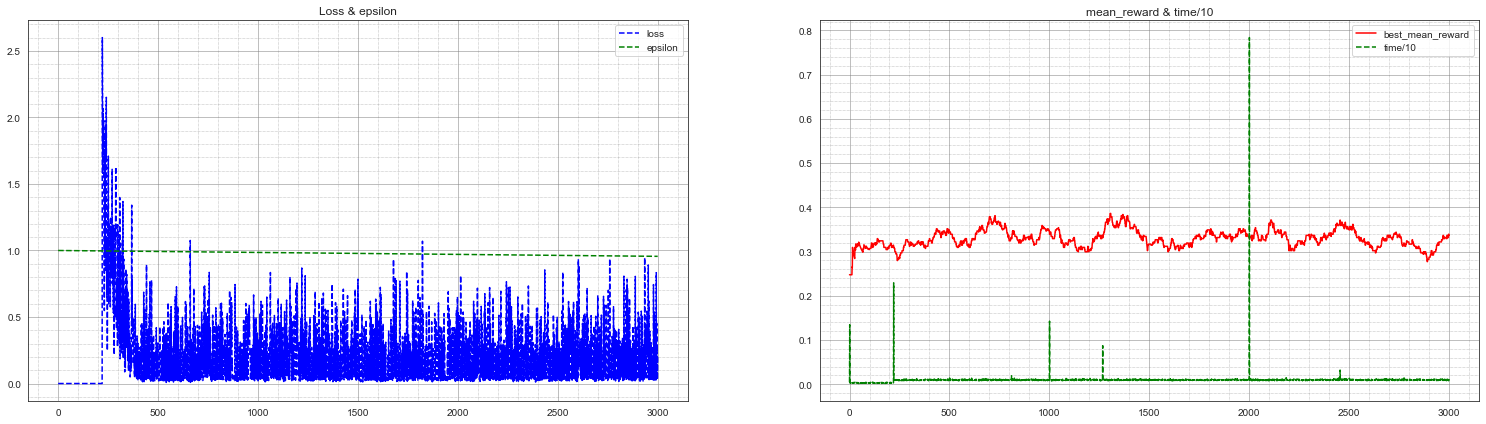

game_episode: 3001, turn: 131397, epsilon: 0.96, mean reward: 0.342, reward 0.7425, loss: 0.1989, time: 10.7384 sec
game_episode: 3002, turn: 131432, epsilon: 0.96, mean reward: 0.344, reward 0.4950, loss: 0.2142, time: 0.1169 sec
game_episode: 3003, turn: 131474, epsilon: 0.96, mean reward: 0.344, reward 0.2475, loss: 0.0379, time: 0.1063 sec
game_episode: 3004, turn: 131512, epsilon: 0.96, mean reward: 0.344, reward 0.2475, loss: 0.0269, time: 0.1388 sec
game_episode: 3005, turn: 131546, epsilon: 0.96, mean reward: 0.344, reward 0.2475, loss: 0.3017, time: 0.0998 sec
game_episode: 3006, turn: 131583, epsilon: 0.96, mean reward: 0.344, reward 0.4950, loss: 0.3901, time: 0.1418 sec
game_episode: 3007, turn: 131647, epsilon: 0.96, mean reward: 0.344, reward 0.4950, loss: 0.2395, time: 0.1274 sec
game_episode: 3008, turn: 131710, epsilon: 0.96, mean reward: 0.344, reward 0.2475, loss: 0.3301, time: 0.1031 sec
game_episode: 3009, turn: 131747, epsilon: 0.96, mean reward: 0.344, reward 0.2

game_episode: 3066, turn: 134273, epsilon: 0.96, mean reward: 0.339, reward 0.2475, loss: 0.0577, time: 0.0962 sec
game_episode: 3067, turn: 134314, epsilon: 0.96, mean reward: 0.339, reward 0.2475, loss: 0.0544, time: 0.1132 sec
game_episode: 3068, turn: 134357, epsilon: 0.96, mean reward: 0.339, reward 0.2475, loss: 0.0306, time: 0.0897 sec
game_episode: 3069, turn: 134418, epsilon: 0.95, mean reward: 0.334, reward 0.2475, loss: 0.3550, time: 0.1114 sec
game_episode: 3070, turn: 134465, epsilon: 0.95, mean reward: 0.334, reward 0.2475, loss: 0.2467, time: 0.1050 sec
game_episode: 3071, turn: 134501, epsilon: 0.95, mean reward: 0.329, reward 0.2475, loss: 0.0338, time: 0.0932 sec
game_episode: 3072, turn: 134534, epsilon: 0.95, mean reward: 0.327, reward 0.2475, loss: 0.0276, time: 0.0940 sec
game_episode: 3073, turn: 134563, epsilon: 0.95, mean reward: 0.327, reward 0.2475, loss: 0.2535, time: 0.0964 sec
game_episode: 3074, turn: 134593, epsilon: 0.95, mean reward: 0.327, reward 0.24

game_episode: 3133, turn: 137122, epsilon: 0.95, mean reward: 0.337, reward 0.2475, loss: 0.2567, time: 0.1134 sec
game_episode: 3134, turn: 137157, epsilon: 0.95, mean reward: 0.337, reward 0.2475, loss: 0.2676, time: 0.0948 sec
game_episode: 3135, turn: 137208, epsilon: 0.95, mean reward: 0.334, reward 0.2475, loss: 0.1868, time: 0.0959 sec
game_episode: 3136, turn: 137250, epsilon: 0.95, mean reward: 0.334, reward 0.2475, loss: 0.5184, time: 0.1017 sec
game_episode: 3137, turn: 137295, epsilon: 0.95, mean reward: 0.334, reward 0.2475, loss: 0.0328, time: 0.0954 sec
game_episode: 3138, turn: 137348, epsilon: 0.95, mean reward: 0.334, reward 0.2475, loss: 0.2470, time: 0.0970 sec
game_episode: 3139, turn: 137396, epsilon: 0.95, mean reward: 0.334, reward 0.2475, loss: 0.0348, time: 0.1021 sec
game_episode: 3140, turn: 137456, epsilon: 0.95, mean reward: 0.334, reward 0.2475, loss: 0.2123, time: 0.1038 sec
game_episode: 3141, turn: 137509, epsilon: 0.95, mean reward: 0.329, reward 0.24

game_episode: 3178, turn: 139178, epsilon: 0.95, mean reward: 0.322, reward 0.2475, loss: 0.4324, time: 0.1070 sec
game_episode: 3179, turn: 139244, epsilon: 0.95, mean reward: 0.322, reward 0.2475, loss: 0.3232, time: 0.1030 sec
game_episode: 3180, turn: 139287, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.5439, time: 0.1051 sec
game_episode: 3181, turn: 139318, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.0372, time: 0.0996 sec
game_episode: 3182, turn: 139360, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.3049, time: 0.0921 sec
game_episode: 3183, turn: 139410, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.2940, time: 0.1040 sec
game_episode: 3184, turn: 139463, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.0171, time: 0.1137 sec
game_episode: 3185, turn: 139501, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.2017, time: 0.0851 sec
game_episode: 3186, turn: 139546, epsilon: 0.95, mean reward: 0.317, reward 0.24

game_episode: 3245, turn: 142003, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.0432, time: 0.1038 sec
game_episode: 3246, turn: 142047, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.2938, time: 0.0916 sec
game_episode: 3247, turn: 142107, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.2193, time: 0.1021 sec
game_episode: 3248, turn: 142148, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.0252, time: 0.0941 sec
game_episode: 3249, turn: 142194, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.0267, time: 0.0965 sec
Defend [0, 19]
tf.Tensor(
[[5.1073446 5.050108  5.154875  5.0261736 5.051632  5.1600704 5.104058
  5.1935153 5.3221397 5.078756  4.9922485 5.1180377 5.261715  5.161749
  5.1176043 4.8837876 5.062986  5.0979533 5.061203  5.4771786 5.1329494
  5.123525  5.0388384 5.2964272 5.171912  4.8602138 5.0809903 5.179352
  5.225889  5.0061526 4.9351754 5.126581  4.912176  5.051171  4.8194776
  5.048475  5.4476213]], shape=(1, 37), dt

game_episode: 3302, turn: 144429, epsilon: 0.95, mean reward: 0.327, reward 0.2475, loss: 0.2544, time: 0.0970 sec
Defend [0, 5, 21]
tf.Tensor(
[[1.815661  1.7500056 1.7338077 1.7167058 1.748652  1.7270141 1.741662
  1.7024707 1.7994497 1.7485473 1.7486225 1.6165437 1.7038914 1.6615174
  1.733048  1.7465408 1.7344289 1.7073054 1.7395326 1.7244852 1.7532898
  1.7364144 1.7700099 1.7435676 1.7677907 1.7372105 1.770333  1.7663325
  1.7641338 1.7010652 1.739003  1.7400281 1.6769959 1.7941315 1.7141262
  1.7087791 1.7096547]], shape=(1, 37), dtype=float32)
[[1.815661  0.        0.        0.        0.        1.7270141 0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  1.7364144 0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.       ]]
0
game_episode: 3303, turn: 144468, epsilon: 0.95, mean reward: 0.327, reward 0.2475, loss: 0

game_episode: 3353, turn: 146776, epsilon: 0.95, mean reward: 0.322, reward 0.4950, loss: 0.0487, time: 0.1017 sec
game_episode: 3354, turn: 146813, epsilon: 0.95, mean reward: 0.322, reward 0.2475, loss: 0.2418, time: 0.0836 sec
game_episode: 3355, turn: 146870, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.0298, time: 0.0991 sec
game_episode: 3356, turn: 146917, epsilon: 0.95, mean reward: 0.312, reward 0.2475, loss: 0.5269, time: 0.0906 sec
game_episode: 3357, turn: 146947, epsilon: 0.95, mean reward: 0.312, reward 0.2475, loss: 0.0367, time: 0.0889 sec
game_episode: 3358, turn: 146973, epsilon: 0.95, mean reward: 0.312, reward 0.2475, loss: 0.3448, time: 0.0871 sec
game_episode: 3359, turn: 147031, epsilon: 0.95, mean reward: 0.309, reward 0.2475, loss: 0.0470, time: 0.0974 sec
game_episode: 3360, turn: 147069, epsilon: 0.95, mean reward: 0.309, reward 0.2475, loss: 0.0248, time: 0.0918 sec
game_episode: 3361, turn: 147120, epsilon: 0.95, mean reward: 0.307, reward 0.24

game_episode: 3405, turn: 149048, epsilon: 0.95, mean reward: 0.351, reward 0.2475, loss: 0.0534, time: 0.1064 sec
game_episode: 3406, turn: 149097, epsilon: 0.95, mean reward: 0.351, reward 0.2475, loss: 0.1747, time: 0.1009 sec
game_episode: 3407, turn: 149142, epsilon: 0.95, mean reward: 0.351, reward 0.2475, loss: 0.4457, time: 0.0917 sec
Passive [0, 10]
tf.Tensor(
[[4.3132052 4.4259768 4.1302023 4.2952356 4.356825  4.3082952 4.340473
  4.4508553 4.4556346 4.49309   4.555354  4.3793035 4.4875026 4.597014
  4.085165  4.3100348 4.5796223 4.537484  4.330351  4.244124  4.548781
  4.3828573 4.3592772 4.294689  4.3793974 4.1448936 4.5923753 4.200296
  4.42857   4.503272  4.4696136 4.296315  4.375179  4.367518  4.3466997
  4.481404  4.4317555]], shape=(1, 37), dtype=float32)
[[4.3132052 0.        0.        0.        0.        0.        0.
  0.        0.        0.        4.555354  0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        

game_episode: 3458, turn: 151353, epsilon: 0.95, mean reward: 0.327, reward 0.2475, loss: 0.2159, time: 0.1027 sec
game_episode: 3459, turn: 151404, epsilon: 0.95, mean reward: 0.327, reward 0.2475, loss: 0.0580, time: 0.1007 sec
game_episode: 3460, turn: 151443, epsilon: 0.95, mean reward: 0.327, reward 0.2475, loss: 0.0405, time: 0.0878 sec
game_episode: 3461, turn: 151509, epsilon: 0.95, mean reward: 0.327, reward 0.2475, loss: 0.0266, time: 0.1167 sec
game_episode: 3462, turn: 151554, epsilon: 0.95, mean reward: 0.322, reward 0.2475, loss: 0.5215, time: 0.0979 sec
game_episode: 3463, turn: 151588, epsilon: 0.95, mean reward: 0.322, reward 0.2475, loss: 0.0387, time: 0.0870 sec
game_episode: 3464, turn: 151626, epsilon: 0.95, mean reward: 0.314, reward 0.2475, loss: 0.0481, time: 0.0898 sec
game_episode: 3465, turn: 151689, epsilon: 0.95, mean reward: 0.314, reward 0.2475, loss: 0.2740, time: 0.1038 sec
game_episode: 3466, turn: 151735, epsilon: 0.95, mean reward: 0.314, reward 0.24

game_episode: 3502, turn: 153162, epsilon: 0.95, mean reward: 0.312, reward 0.7425, loss: 0.0378, time: 0.0959 sec
game_episode: 3503, turn: 153197, epsilon: 0.95, mean reward: 0.309, reward 0.2475, loss: 0.4278, time: 0.0892 sec
game_episode: 3504, turn: 153244, epsilon: 0.95, mean reward: 0.309, reward 0.2475, loss: 0.0197, time: 0.1118 sec
game_episode: 3505, turn: 153305, epsilon: 0.95, mean reward: 0.309, reward 0.2475, loss: 0.5526, time: 0.1069 sec
game_episode: 3506, turn: 153353, epsilon: 0.95, mean reward: 0.309, reward 0.2475, loss: 0.0271, time: 0.1076 sec
game_episode: 3507, turn: 153385, epsilon: 0.95, mean reward: 0.309, reward 0.2475, loss: 0.0480, time: 0.0888 sec
game_episode: 3508, turn: 153416, epsilon: 0.95, mean reward: 0.309, reward 0.2475, loss: 0.0324, time: 0.0968 sec
game_episode: 3509, turn: 153449, epsilon: 0.95, mean reward: 0.314, reward 0.7425, loss: 0.2765, time: 0.1010 sec
game_episode: 3510, turn: 153485, epsilon: 0.95, mean reward: 0.309, reward 0.24

game_episode: 3548, turn: 155077, epsilon: 0.95, mean reward: 0.319, reward 0.2475, loss: 0.0353, time: 0.0895 sec
game_episode: 3549, turn: 155119, epsilon: 0.95, mean reward: 0.319, reward 0.2475, loss: 0.0352, time: 0.1033 sec
game_episode: 3550, turn: 155166, epsilon: 0.95, mean reward: 0.319, reward 0.2475, loss: 0.2977, time: 0.0957 sec
game_episode: 3551, turn: 155200, epsilon: 0.95, mean reward: 0.319, reward 0.2475, loss: 0.0325, time: 0.1003 sec
game_episode: 3552, turn: 155227, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.3030, time: 0.0857 sec
game_episode: 3553, turn: 155283, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.0260, time: 0.1078 sec
game_episode: 3554, turn: 155312, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.2229, time: 0.0855 sec
game_episode: 3555, turn: 155347, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.2936, time: 0.0876 sec
game_episode: 3556, turn: 155379, epsilon: 0.95, mean reward: 0.324, reward 0.99

game_episode: 3592, turn: 156908, epsilon: 0.95, mean reward: 0.337, reward 0.7425, loss: 0.7061, time: 0.0934 sec
game_episode: 3593, turn: 156958, epsilon: 0.95, mean reward: 0.339, reward 0.9900, loss: 0.0364, time: 0.1036 sec
game_episode: 3594, turn: 156991, epsilon: 0.95, mean reward: 0.337, reward 0.2475, loss: 0.5670, time: 0.0913 sec
game_episode: 3595, turn: 157042, epsilon: 0.95, mean reward: 0.337, reward 0.2475, loss: 0.4386, time: 0.1010 sec
game_episode: 3596, turn: 157081, epsilon: 0.95, mean reward: 0.337, reward 0.2475, loss: 0.3396, time: 0.0922 sec
game_episode: 3597, turn: 157146, epsilon: 0.95, mean reward: 0.337, reward 0.2475, loss: 0.2532, time: 0.1133 sec
game_episode: 3598, turn: 157184, epsilon: 0.95, mean reward: 0.332, reward 0.2475, loss: 0.0273, time: 0.0962 sec
game_episode: 3599, turn: 157213, epsilon: 0.95, mean reward: 0.332, reward 0.2475, loss: 0.2674, time: 0.0959 sec
game_episode: 3600, turn: 157242, epsilon: 0.95, mean reward: 0.332, reward 0.24

game_episode: 3636, turn: 158803, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.0344, time: 0.0985 sec
game_episode: 3637, turn: 158858, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.0280, time: 0.1096 sec
game_episode: 3638, turn: 158891, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.0324, time: 0.0898 sec
game_episode: 3639, turn: 158921, epsilon: 0.95, mean reward: 0.317, reward 0.2475, loss: 0.2211, time: 0.0870 sec
game_episode: 3640, turn: 158970, epsilon: 0.95, mean reward: 0.322, reward 0.7425, loss: 0.0113, time: 0.0947 sec
game_episode: 3641, turn: 159017, epsilon: 0.95, mean reward: 0.322, reward 0.2475, loss: 0.0288, time: 0.0931 sec
game_episode: 3642, turn: 159051, epsilon: 0.95, mean reward: 0.322, reward 0.2475, loss: 0.0542, time: 0.0871 sec
game_episode: 3643, turn: 159087, epsilon: 0.95, mean reward: 0.322, reward 0.2475, loss: 0.4864, time: 0.0910 sec
game_episode: 3644, turn: 159141, epsilon: 0.95, mean reward: 0.322, reward 0.24

game_episode: 3687, turn: 160997, epsilon: 0.95, mean reward: 0.332, reward 0.7425, loss: 0.2611, time: 0.0908 sec
game_episode: 3688, turn: 161043, epsilon: 0.95, mean reward: 0.332, reward 0.2475, loss: 0.0193, time: 0.0989 sec
game_episode: 3689, turn: 161097, epsilon: 0.95, mean reward: 0.329, reward 0.2475, loss: 0.0323, time: 0.1055 sec
game_episode: 3690, turn: 161136, epsilon: 0.95, mean reward: 0.329, reward 0.2475, loss: 0.4341, time: 0.0892 sec
game_episode: 3691, turn: 161180, epsilon: 0.95, mean reward: 0.329, reward 0.2475, loss: 0.2492, time: 0.0966 sec
game_episode: 3692, turn: 161208, epsilon: 0.95, mean reward: 0.329, reward 0.7425, loss: 0.0458, time: 0.0835 sec
game_episode: 3693, turn: 161267, epsilon: 0.95, mean reward: 0.324, reward 0.4950, loss: 0.0572, time: 0.1153 sec
game_episode: 3694, turn: 161300, epsilon: 0.95, mean reward: 0.332, reward 0.9900, loss: 0.3372, time: 0.1014 sec
game_episode: 3695, turn: 161346, epsilon: 0.95, mean reward: 0.332, reward 0.24

game_episode: 3739, turn: 163225, epsilon: 0.95, mean reward: 0.359, reward 0.2475, loss: 0.0229, time: 0.0908 sec
game_episode: 3740, turn: 163278, epsilon: 0.95, mean reward: 0.354, reward 0.2475, loss: 0.0415, time: 0.0983 sec
game_episode: 3741, turn: 163314, epsilon: 0.95, mean reward: 0.354, reward 0.2475, loss: 0.0155, time: 0.0959 sec
game_episode: 3742, turn: 163355, epsilon: 0.95, mean reward: 0.354, reward 0.2475, loss: 0.3704, time: 0.0998 sec
game_episode: 3743, turn: 163395, epsilon: 0.95, mean reward: 0.354, reward 0.2475, loss: 0.0301, time: 0.1040 sec
game_episode: 3744, turn: 163431, epsilon: 0.95, mean reward: 0.354, reward 0.2475, loss: 0.2183, time: 0.0914 sec
game_episode: 3745, turn: 163464, epsilon: 0.95, mean reward: 0.354, reward 0.2475, loss: 0.0449, time: 0.0906 sec
game_episode: 3746, turn: 163498, epsilon: 0.95, mean reward: 0.361, reward 0.9900, loss: 0.4180, time: 0.0828 sec
game_episode: 3747, turn: 163538, epsilon: 0.95, mean reward: 0.356, reward 0.24

game_episode: 3771, turn: 164556, epsilon: 0.94, mean reward: 0.347, reward 0.2475, loss: 0.0401, time: 0.0970 sec
game_episode: 3772, turn: 164580, epsilon: 0.94, mean reward: 0.342, reward 0.2475, loss: 0.3130, time: 0.0914 sec
game_episode: 3773, turn: 164611, epsilon: 0.94, mean reward: 0.342, reward 0.2475, loss: 0.2653, time: 0.1053 sec
game_episode: 3774, turn: 164653, epsilon: 0.94, mean reward: 0.337, reward 0.2475, loss: 0.5445, time: 0.0985 sec
Defend [0, 6, 2]
tf.Tensor(
[[5.0559053 5.251594  5.021618  5.261015  5.0725784 5.0908613 5.1541204
  5.103026  5.120691  4.803543  5.1679497 5.187385  4.6556735 5.042129
  5.0858407 4.8714123 5.140821  5.0218415 5.274007  4.9278946 5.036046
  5.5316086 5.428921  5.231934  4.915166  4.996217  5.1539865 5.032316
  5.2007117 5.2443    5.0728908 5.277015  4.8484416 5.1805587 5.096205
  4.6966767 5.1340175]], shape=(1, 37), dtype=float32)
[[5.0559053 0.        5.021618  0.        0.        0.        5.1541204
  0.        0.        0.     

game_episode: 3829, turn: 167038, epsilon: 0.94, mean reward: 0.339, reward 0.2475, loss: 0.4278, time: 0.0808 sec
game_episode: 3830, turn: 167077, epsilon: 0.94, mean reward: 0.344, reward 0.7425, loss: 0.0407, time: 0.1023 sec
game_episode: 3831, turn: 167111, epsilon: 0.94, mean reward: 0.344, reward 0.2475, loss: 0.0655, time: 0.0901 sec
game_episode: 3832, turn: 167149, epsilon: 0.94, mean reward: 0.344, reward 0.2475, loss: 0.0475, time: 0.0978 sec
game_episode: 3833, turn: 167200, epsilon: 0.94, mean reward: 0.339, reward 0.2475, loss: 0.0597, time: 0.1003 sec
game_episode: 3834, turn: 167238, epsilon: 0.94, mean reward: 0.339, reward 0.2475, loss: 0.0468, time: 0.0872 sec
game_episode: 3835, turn: 167277, epsilon: 0.94, mean reward: 0.344, reward 0.7425, loss: 0.0514, time: 0.0976 sec
game_episode: 3836, turn: 167314, epsilon: 0.94, mean reward: 0.344, reward 0.2475, loss: 0.4536, time: 0.0934 sec
game_episode: 3837, turn: 167392, epsilon: 0.94, mean reward: 0.339, reward 0.24

game_episode: 3875, turn: 169030, epsilon: 0.94, mean reward: 0.339, reward 0.2475, loss: 0.0335, time: 0.0897 sec
game_episode: 3876, turn: 169070, epsilon: 0.94, mean reward: 0.339, reward 0.2475, loss: 0.0961, time: 0.1126 sec
game_episode: 3877, turn: 169115, epsilon: 0.94, mean reward: 0.339, reward 0.2475, loss: 0.0808, time: 0.0973 sec
game_episode: 3878, turn: 169144, epsilon: 0.94, mean reward: 0.334, reward 0.2475, loss: 0.2179, time: 0.1001 sec
game_episode: 3879, turn: 169196, epsilon: 0.94, mean reward: 0.334, reward 0.2475, loss: 0.0748, time: 0.0996 sec
game_episode: 3880, turn: 169255, epsilon: 0.94, mean reward: 0.334, reward 0.2475, loss: 0.0548, time: 0.1035 sec
game_episode: 3881, turn: 169292, epsilon: 0.94, mean reward: 0.334, reward 0.2475, loss: 0.2964, time: 0.0912 sec
game_episode: 3882, turn: 169340, epsilon: 0.94, mean reward: 0.329, reward 0.2475, loss: 0.0617, time: 0.0977 sec
game_episode: 3883, turn: 169382, epsilon: 0.94, mean reward: 0.327, reward 0.24

game_episode: 3917, turn: 170851, epsilon: 0.94, mean reward: 0.299, reward 0.2475, loss: 1.0564, time: 0.1035 sec
game_episode: 3918, turn: 170902, epsilon: 0.94, mean reward: 0.307, reward 0.9900, loss: 0.2454, time: 0.1585 sec
game_episode: 3919, turn: 170941, epsilon: 0.94, mean reward: 0.307, reward 0.2475, loss: 0.7736, time: 0.0922 sec
game_episode: 3920, turn: 170987, epsilon: 0.94, mean reward: 0.307, reward 0.2475, loss: 0.5914, time: 0.0907 sec
game_episode: 3921, turn: 171030, epsilon: 0.94, mean reward: 0.312, reward 0.7425, loss: 0.2896, time: 0.0904 sec
Attack [0, 27]
tf.Tensor(
[[2.5037096 2.2062526 2.4977808 2.417196  2.4991841 2.5170906 2.5677261
  2.5245802 2.4843705 2.5050325 2.5019312 2.4337769 2.4096346 2.47369
  2.4574618 2.54773   2.35953   2.4545875 2.6338716 2.4338741 2.499528
  2.5924606 2.4608283 2.4538627 2.5459912 2.411551  2.5017388 2.5194445
  2.494719  2.5157151 2.45297   2.435924  2.5109408 2.4976416 2.4853737
  2.4189024 2.5936465]], shape=(1, 37), dt

game_episode: 3956, turn: 172560, epsilon: 0.94, mean reward: 0.319, reward 0.2475, loss: 0.4993, time: 0.1136 sec
game_episode: 3957, turn: 172605, epsilon: 0.94, mean reward: 0.314, reward 0.2475, loss: 0.2993, time: 0.0892 sec
game_episode: 3958, turn: 172653, epsilon: 0.94, mean reward: 0.314, reward 0.2475, loss: 0.0472, time: 0.1004 sec
game_episode: 3959, turn: 172689, epsilon: 0.94, mean reward: 0.314, reward 0.2475, loss: 0.0414, time: 0.0911 sec
game_episode: 3960, turn: 172727, epsilon: 0.94, mean reward: 0.307, reward 0.2475, loss: 0.5577, time: 0.0933 sec
game_episode: 3961, turn: 172759, epsilon: 0.94, mean reward: 0.314, reward 0.9900, loss: 0.0720, time: 0.0853 sec
game_episode: 3962, turn: 172799, epsilon: 0.94, mean reward: 0.314, reward 0.2475, loss: 0.0483, time: 0.0939 sec
game_episode: 3963, turn: 172830, epsilon: 0.94, mean reward: 0.314, reward 0.2475, loss: 0.2736, time: 0.0919 sec
game_episode: 3964, turn: 172862, epsilon: 0.94, mean reward: 0.314, reward 0.24

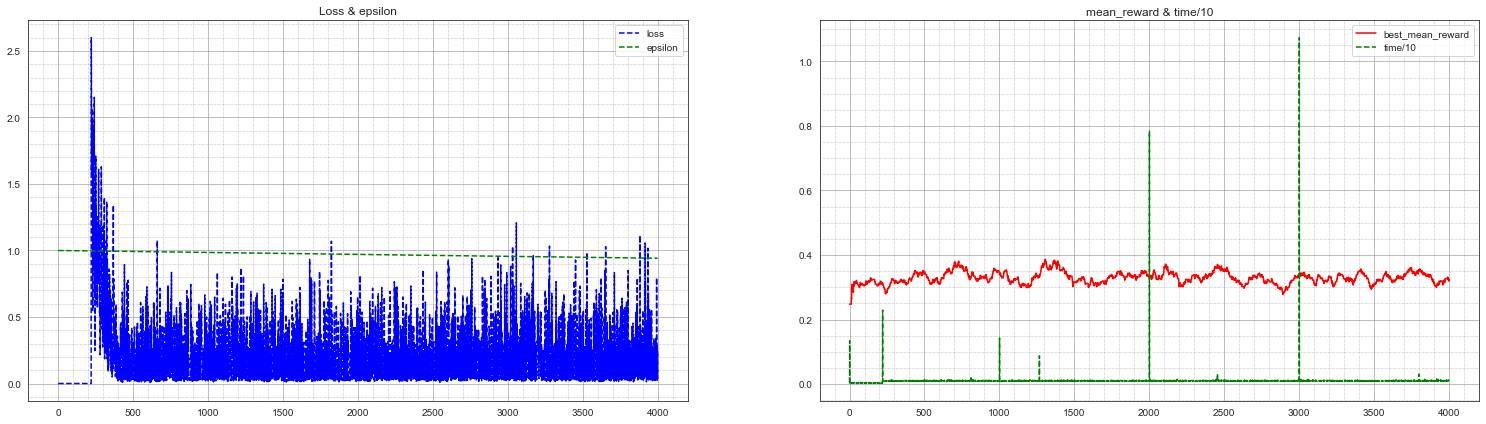

game_episode: 4001, turn: 174500, epsilon: 0.94, mean reward: 0.324, reward 0.2475, loss: 0.0340, time: 14.7718 sec
game_episode: 4002, turn: 174539, epsilon: 0.94, mean reward: 0.324, reward 0.2475, loss: 0.2982, time: 0.0945 sec
game_episode: 4003, turn: 174594, epsilon: 0.94, mean reward: 0.324, reward 0.2475, loss: 0.2649, time: 0.1024 sec
game_episode: 4004, turn: 174639, epsilon: 0.94, mean reward: 0.324, reward 0.2475, loss: 0.0679, time: 0.0981 sec
game_episode: 4005, turn: 174679, epsilon: 0.94, mean reward: 0.324, reward 0.2475, loss: 0.0222, time: 0.1005 sec
game_episode: 4006, turn: 174736, epsilon: 0.94, mean reward: 0.329, reward 0.7425, loss: 0.0260, time: 0.1028 sec
game_episode: 4007, turn: 174778, epsilon: 0.94, mean reward: 0.329, reward 0.2475, loss: 0.5407, time: 0.0909 sec
game_episode: 4008, turn: 174819, epsilon: 0.94, mean reward: 0.329, reward 0.2475, loss: 0.2342, time: 0.0936 sec
Attack [0, 16, 7]
tf.Tensor(
[[3.914153  3.9330528 3.8119369 3.7784271 3.924736

game_episode: 4046, turn: 176432, epsilon: 0.94, mean reward: 0.332, reward 0.2475, loss: 0.0327, time: 0.1042 sec
game_episode: 4047, turn: 176481, epsilon: 0.94, mean reward: 0.332, reward 0.2475, loss: 0.0345, time: 0.0965 sec
game_episode: 4048, turn: 176567, epsilon: 0.94, mean reward: 0.337, reward 0.7425, loss: 0.0463, time: 0.1200 sec
game_episode: 4049, turn: 176612, epsilon: 0.94, mean reward: 0.337, reward 0.2475, loss: 0.0361, time: 0.0998 sec
game_episode: 4050, turn: 176667, epsilon: 0.94, mean reward: 0.337, reward 0.2475, loss: 0.2322, time: 0.1019 sec
game_episode: 4051, turn: 176712, epsilon: 0.94, mean reward: 0.337, reward 0.2475, loss: 0.0470, time: 0.0953 sec
game_episode: 4052, turn: 176757, epsilon: 0.94, mean reward: 0.337, reward 0.2475, loss: 0.3422, time: 0.0902 sec
game_episode: 4053, turn: 176804, epsilon: 0.94, mean reward: 0.337, reward 0.2475, loss: 0.0484, time: 0.1407 sec
game_episode: 4054, turn: 176855, epsilon: 0.94, mean reward: 0.337, reward 0.24

game_episode: 4092, turn: 178523, epsilon: 0.94, mean reward: 0.329, reward 0.2475, loss: 0.2495, time: 0.0958 sec
game_episode: 4093, turn: 178575, epsilon: 0.94, mean reward: 0.327, reward 0.2475, loss: 0.2729, time: 0.0967 sec
game_episode: 4094, turn: 178619, epsilon: 0.94, mean reward: 0.327, reward 0.2475, loss: 0.0262, time: 0.1124 sec
game_episode: 4095, turn: 178657, epsilon: 0.94, mean reward: 0.327, reward 0.2475, loss: 0.0576, time: 0.0969 sec
game_episode: 4096, turn: 178690, epsilon: 0.94, mean reward: 0.327, reward 0.2475, loss: 0.2677, time: 0.0910 sec
game_episode: 4097, turn: 178739, epsilon: 0.94, mean reward: 0.327, reward 0.2475, loss: 0.0485, time: 0.1001 sec
game_episode: 4098, turn: 178797, epsilon: 0.94, mean reward: 0.327, reward 0.2475, loss: 0.3809, time: 0.1002 sec
game_episode: 4099, turn: 178822, epsilon: 0.94, mean reward: 0.327, reward 0.2475, loss: 0.2801, time: 0.0820 sec
game_episode: 4100, turn: 178862, epsilon: 0.94, mean reward: 0.324, reward 0.49

game_episode: 4147, turn: 180903, epsilon: 0.94, mean reward: 0.334, reward 0.2475, loss: 0.4246, time: 0.0936 sec
game_episode: 4148, turn: 180936, epsilon: 0.94, mean reward: 0.329, reward 0.2475, loss: 0.0413, time: 0.1128 sec
game_episode: 4149, turn: 180974, epsilon: 0.94, mean reward: 0.334, reward 0.7425, loss: 0.2585, time: 0.1084 sec
game_episode: 4150, turn: 181024, epsilon: 0.94, mean reward: 0.334, reward 0.2475, loss: 0.0644, time: 0.1066 sec
game_episode: 4151, turn: 181063, epsilon: 0.94, mean reward: 0.339, reward 0.7425, loss: 0.2518, time: 0.0915 sec
game_episode: 4152, turn: 181108, epsilon: 0.94, mean reward: 0.339, reward 0.2475, loss: 0.3906, time: 0.1062 sec
game_episode: 4153, turn: 181145, epsilon: 0.94, mean reward: 0.339, reward 0.2475, loss: 0.0176, time: 0.0864 sec
game_episode: 4154, turn: 181188, epsilon: 0.94, mean reward: 0.344, reward 0.7425, loss: 0.0216, time: 0.0967 sec
game_episode: 4155, turn: 181240, epsilon: 0.94, mean reward: 0.344, reward 0.24

game_episode: 4199, turn: 183135, epsilon: 0.94, mean reward: 0.344, reward 0.2475, loss: 0.0609, time: 0.1072 sec
game_episode: 4200, turn: 183169, epsilon: 0.94, mean reward: 0.342, reward 0.2475, loss: 0.2990, time: 0.0946 sec
Passive [0, 31, 30]
tf.Tensor(
[[3.9262342 4.084243  3.8951087 3.925825  4.0473313 3.916396  3.8376088
  3.8772848 3.9348621 4.023108  3.8103287 3.8627887 3.916902  3.9277842
  4.0204406 3.8995898 3.8934853 3.9053066 3.9367118 3.7773073 3.9150102
  4.132577  3.9004319 3.9725926 3.9632745 3.972752  3.995217  3.8079762
  3.9320931 3.9154098 3.882935  3.805504  3.7623956 4.151955  3.8715262
  4.052893  3.9530296]], shape=(1, 37), dtype=float32)
[[3.9262342 0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        3.882935  3.805504  0.        0.        0.

game_episode: 4236, turn: 184677, epsilon: 0.94, mean reward: 0.334, reward 0.2475, loss: 0.5439, time: 0.1047 sec
game_episode: 4237, turn: 184722, epsilon: 0.94, mean reward: 0.332, reward 0.2475, loss: 0.4960, time: 0.1042 sec
game_episode: 4238, turn: 184763, epsilon: 0.94, mean reward: 0.332, reward 0.7425, loss: 0.2764, time: 0.1080 sec
game_episode: 4239, turn: 184809, epsilon: 0.94, mean reward: 0.332, reward 0.2475, loss: 0.0366, time: 0.0939 sec
game_episode: 4240, turn: 184837, epsilon: 0.94, mean reward: 0.332, reward 0.2475, loss: 0.0375, time: 0.0912 sec
game_episode: 4241, turn: 184883, epsilon: 0.94, mean reward: 0.332, reward 0.2475, loss: 0.0446, time: 0.1471 sec
game_episode: 4242, turn: 184929, epsilon: 0.94, mean reward: 0.332, reward 0.2475, loss: 0.0224, time: 0.0953 sec
game_episode: 4243, turn: 184984, epsilon: 0.94, mean reward: 0.327, reward 0.2475, loss: 0.0387, time: 0.0959 sec
game_episode: 4244, turn: 185015, epsilon: 0.94, mean reward: 0.322, reward 0.24

game_episode: 4294, turn: 187173, epsilon: 0.94, mean reward: 0.324, reward 0.2475, loss: 0.4716, time: 0.1016 sec
game_episode: 4295, turn: 187216, epsilon: 0.94, mean reward: 0.324, reward 0.2475, loss: 0.0517, time: 0.1002 sec
game_episode: 4296, turn: 187256, epsilon: 0.94, mean reward: 0.324, reward 0.2475, loss: 0.3330, time: 0.0921 sec
game_episode: 4297, turn: 187291, epsilon: 0.94, mean reward: 0.329, reward 0.7425, loss: 0.2292, time: 0.0956 sec
game_episode: 4298, turn: 187339, epsilon: 0.94, mean reward: 0.329, reward 0.2475, loss: 0.6220, time: 0.0905 sec
game_episode: 4299, turn: 187394, epsilon: 0.94, mean reward: 0.329, reward 0.2475, loss: 0.2711, time: 0.0937 sec
game_episode: 4300, turn: 187427, epsilon: 0.94, mean reward: 0.329, reward 0.2475, loss: 0.4871, time: 0.0878 sec
game_episode: 4301, turn: 187469, epsilon: 0.94, mean reward: 0.327, reward 0.2475, loss: 0.0494, time: 0.0996 sec
game_episode: 4302, turn: 187499, epsilon: 0.94, mean reward: 0.334, reward 0.99

game_episode: 4346, turn: 189542, epsilon: 0.94, mean reward: 0.327, reward 0.2475, loss: 0.2954, time: 0.1172 sec
game_episode: 4347, turn: 189598, epsilon: 0.94, mean reward: 0.327, reward 0.2475, loss: 0.2724, time: 0.1154 sec
game_episode: 4348, turn: 189653, epsilon: 0.94, mean reward: 0.327, reward 0.2475, loss: 0.0539, time: 0.1008 sec
game_episode: 4349, turn: 189695, epsilon: 0.94, mean reward: 0.327, reward 0.2475, loss: 0.0325, time: 0.0866 sec
game_episode: 4350, turn: 189732, epsilon: 0.94, mean reward: 0.324, reward 0.2475, loss: 0.8336, time: 0.0988 sec
game_episode: 4351, turn: 189761, epsilon: 0.94, mean reward: 0.319, reward 0.2475, loss: 0.2747, time: 0.0913 sec
game_episode: 4352, turn: 189802, epsilon: 0.94, mean reward: 0.319, reward 0.2475, loss: 0.0180, time: 0.0959 sec
game_episode: 4353, turn: 189853, epsilon: 0.94, mean reward: 0.319, reward 0.2475, loss: 0.0445, time: 0.1066 sec
game_episode: 4354, turn: 189892, epsilon: 0.94, mean reward: 0.319, reward 0.24

game_episode: 4397, turn: 191808, epsilon: 0.94, mean reward: 0.332, reward 0.2475, loss: 0.0293, time: 0.1125 sec
game_episode: 4398, turn: 191859, epsilon: 0.94, mean reward: 0.332, reward 0.2475, loss: 0.0366, time: 0.1093 sec
game_episode: 4399, turn: 191906, epsilon: 0.94, mean reward: 0.332, reward 0.2475, loss: 0.2137, time: 0.1064 sec
game_episode: 4400, turn: 191946, epsilon: 0.94, mean reward: 0.332, reward 0.2475, loss: 0.0339, time: 0.0952 sec
game_episode: 4401, turn: 191988, epsilon: 0.94, mean reward: 0.332, reward 0.2475, loss: 0.2094, time: 0.0953 sec
game_episode: 4402, turn: 192027, epsilon: 0.94, mean reward: 0.324, reward 0.2475, loss: 0.2607, time: 0.0903 sec
game_episode: 4403, turn: 192062, epsilon: 0.94, mean reward: 0.324, reward 0.2475, loss: 0.8245, time: 0.0840 sec
game_episode: 4404, turn: 192094, epsilon: 0.94, mean reward: 0.332, reward 0.9900, loss: 0.2140, time: 0.0914 sec
game_episode: 4405, turn: 192132, epsilon: 0.94, mean reward: 0.332, reward 0.24

game_episode: 4441, turn: 193750, epsilon: 0.94, mean reward: 0.366, reward 0.9900, loss: 0.0357, time: 0.0910 sec
game_episode: 4442, turn: 193778, epsilon: 0.94, mean reward: 0.371, reward 0.7425, loss: 0.4646, time: 0.0895 sec
game_episode: 4443, turn: 193805, epsilon: 0.94, mean reward: 0.369, reward 0.7425, loss: 0.2728, time: 0.0850 sec
game_episode: 4444, turn: 193853, epsilon: 0.94, mean reward: 0.369, reward 0.2475, loss: 0.0582, time: 0.0934 sec
game_episode: 4445, turn: 193887, epsilon: 0.94, mean reward: 0.374, reward 0.7425, loss: 0.2456, time: 0.0878 sec
game_episode: 4446, turn: 193918, epsilon: 0.94, mean reward: 0.381, reward 0.9900, loss: 0.0157, time: 0.0982 sec
game_episode: 4447, turn: 193946, epsilon: 0.94, mean reward: 0.384, reward 0.4950, loss: 0.2865, time: 0.0920 sec
game_episode: 4448, turn: 193980, epsilon: 0.94, mean reward: 0.384, reward 0.2475, loss: 0.4713, time: 0.0875 sec
game_episode: 4449, turn: 194015, epsilon: 0.94, mean reward: 0.384, reward 0.24

tf.Tensor(
[[4.083508  4.229399  4.1488833 4.1799197 4.0731096 4.3290052 4.0929427
  4.3857207 4.033229  4.2532525 4.2242575 4.3421044 4.521875  4.0858116
  4.2527633 4.1351438 4.3362336 4.2013535 4.1910386 4.127024  4.1301737
  3.8969352 3.9375994 4.2562284 4.168928  4.224719  4.240537  4.2737007
  4.1021795 4.153545  4.169131  4.2301188 4.3809433 4.2858086 4.199191
  4.4712234 4.522495 ]], shape=(1, 37), dtype=float32)
[[4.083508 0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       4.224719 0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.      ]]
25
game_episode: 4487, turn: 195676, epsilon: 0.93, mean reward: 0.384, reward 0.2475, loss: 0.3814, time: 0.1101 sec
game_episode: 4488, turn: 195710, epsilon: 0.93, mean reward: 0.384, reward 0.2475, loss: 0.0861, time: 0.0879 sec
game_episode: 4489, t

game_episode: 4526, turn: 197444, epsilon: 0.93, mean reward: 0.381, reward 0.2475, loss: 0.0342, time: 0.1102 sec
game_episode: 4527, turn: 197487, epsilon: 0.93, mean reward: 0.381, reward 0.2475, loss: 0.3995, time: 0.0999 sec
game_episode: 4528, turn: 197537, epsilon: 0.93, mean reward: 0.376, reward 0.2475, loss: 0.0436, time: 0.0969 sec
game_episode: 4529, turn: 197580, epsilon: 0.93, mean reward: 0.369, reward 0.2475, loss: 0.2597, time: 0.0995 sec
Defend [0, 23]
tf.Tensor(
[[5.3234663 5.434376  5.194239  5.4158907 5.5453167 5.218866  5.060021
  5.2182517 5.277902  5.3656726 4.8135815 5.37667   4.701061  5.39932
  5.4254766 5.1898117 5.4895144 5.280954  5.253481  5.2594094 5.39974
  5.3723264 5.1845117 5.243954  4.8084965 5.3037715 5.138697  5.2853193
  5.1540117 5.46895   5.296182  5.621479  5.354954  5.301301  5.354844
  5.200397  5.3347926]], shape=(1, 37), dtype=float32)
[[5.3234663 0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.      

game_episode: 4563, turn: 199082, epsilon: 0.93, mean reward: 0.339, reward 0.2475, loss: 0.0486, time: 0.1009 sec
game_episode: 4564, turn: 199134, epsilon: 0.93, mean reward: 0.339, reward 0.2475, loss: 0.0547, time: 0.1000 sec
game_episode: 4565, turn: 199173, epsilon: 0.93, mean reward: 0.339, reward 0.2475, loss: 0.5945, time: 0.0960 sec
game_episode: 4566, turn: 199193, epsilon: 0.93, mean reward: 0.339, reward 0.9900, loss: 0.0354, time: 0.0845 sec
game_episode: 4567, turn: 199252, epsilon: 0.93, mean reward: 0.339, reward 0.2475, loss: 0.0414, time: 0.1221 sec
game_episode: 4568, turn: 199292, epsilon: 0.93, mean reward: 0.339, reward 0.2475, loss: 0.2523, time: 0.1022 sec
game_episode: 4569, turn: 199333, epsilon: 0.93, mean reward: 0.344, reward 0.7425, loss: 0.0558, time: 0.1045 sec
game_episode: 4570, turn: 199379, epsilon: 0.93, mean reward: 0.344, reward 0.2475, loss: 0.0319, time: 0.0982 sec
game_episode: 4571, turn: 199419, epsilon: 0.93, mean reward: 0.344, reward 0.24

game_episode: 4603, turn: 200853, epsilon: 0.93, mean reward: 0.349, reward 0.2475, loss: 0.0361, time: 0.0894 sec
game_episode: 4604, turn: 200895, epsilon: 0.93, mean reward: 0.342, reward 0.2475, loss: 0.0431, time: 0.1049 sec
game_episode: 4605, turn: 200928, epsilon: 0.93, mean reward: 0.344, reward 0.4950, loss: 0.3315, time: 0.0884 sec
game_episode: 4606, turn: 200966, epsilon: 0.93, mean reward: 0.344, reward 0.2475, loss: 0.0412, time: 0.1187 sec
game_episode: 4607, turn: 200997, epsilon: 0.93, mean reward: 0.351, reward 0.9900, loss: 0.0484, time: 0.1026 sec
game_episode: 4608, turn: 201039, epsilon: 0.93, mean reward: 0.351, reward 0.2475, loss: 0.0240, time: 0.1054 sec
game_episode: 4609, turn: 201077, epsilon: 0.93, mean reward: 0.354, reward 0.4950, loss: 0.0444, time: 0.1071 sec
Defend [0, 23, 32, 29]
tf.Tensor(
[[5.2906356 5.723982  5.360617  5.6799626 5.4522815 5.4672627 5.342537
  5.436267  5.319936  5.4198494 5.426933  5.539044  5.5643034 5.2664304
  5.2449827 5.5372

game_episode: 4655, turn: 203041, epsilon: 0.93, mean reward: 0.339, reward 0.2475, loss: 0.3398, time: 0.1106 sec
game_episode: 4656, turn: 203082, epsilon: 0.93, mean reward: 0.334, reward 0.2475, loss: 0.0331, time: 0.0951 sec
game_episode: 4657, turn: 203146, epsilon: 0.93, mean reward: 0.339, reward 0.7425, loss: 0.3704, time: 0.1124 sec
game_episode: 4658, turn: 203202, epsilon: 0.93, mean reward: 0.339, reward 0.2475, loss: 0.0477, time: 0.1153 sec
game_episode: 4659, turn: 203246, epsilon: 0.93, mean reward: 0.342, reward 0.7425, loss: 0.0305, time: 0.0988 sec
Passive [0, 10, 2, 12]
tf.Tensor(
[[3.2501419 3.1743083 3.118198  3.2242234 3.195066  3.1641884 3.2299163
  3.214873  3.1511917 3.126851  3.2799454 3.0898666 3.2423642 3.1851537
  3.122851  3.1950753 3.1703792 3.3108273 2.8931599 3.1981707 3.3105924
  3.2727299 3.201983  3.176458  3.2287686 3.117     3.3068292 3.2050674
  3.0665083 3.2095807 3.2012227 3.1321528 3.2616665 3.1409795 3.181142
  3.1328833 3.1904163]], shape=(

game_episode: 4683, turn: 204391, epsilon: 0.93, mean reward: 0.329, reward 0.2475, loss: 0.2766, time: 0.1173 sec
Passive [0, 2, 11, 31]
tf.Tensor(
[[3.262075  3.1802323 3.1735756 3.2012572 3.2260013 3.2329736 3.2543929
  3.1539345 3.3314857 3.3249557 3.1641657 3.129856  3.1506174 3.32863
  3.2085288 3.0978384 3.004486  3.028487  3.1912847 3.2583616 3.1435692
  3.179365  3.1263092 3.2001624 3.2576668 3.1836183 3.1330478 3.2996147
  3.1950967 3.0991964 3.229524  3.2045183 3.1216016 3.2376587 3.1194918
  3.174721  3.0969965]], shape=(1, 37), dtype=float32)
[[3.262075  0.        3.1735756 0.        0.        0.        0.
  0.        0.        0.        0.        3.129856  0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        3.2045183 0.        0.        0.
  0.        0.       ]]
0
game_episode: 4684, turn: 204423, epsilon: 0.93, mean reward: 0.329, reward 0.2475, los

game_episode: 4727, turn: 206283, epsilon: 0.93, mean reward: 0.324, reward 0.2475, loss: 0.9257, time: 0.1137 sec
game_episode: 4728, turn: 206318, epsilon: 0.93, mean reward: 0.324, reward 0.2475, loss: 0.1798, time: 0.0918 sec
game_episode: 4729, turn: 206355, epsilon: 0.93, mean reward: 0.324, reward 0.2475, loss: 0.0890, time: 0.1281 sec
game_episode: 4730, turn: 206382, epsilon: 0.93, mean reward: 0.324, reward 0.2475, loss: 0.6544, time: 0.0984 sec
game_episode: 4731, turn: 206429, epsilon: 0.93, mean reward: 0.324, reward 0.2475, loss: 0.1693, time: 0.0941 sec
game_episode: 4732, turn: 206476, epsilon: 0.93, mean reward: 0.329, reward 0.7425, loss: 0.1244, time: 0.1066 sec
game_episode: 4733, turn: 206526, epsilon: 0.93, mean reward: 0.329, reward 0.2475, loss: 0.0664, time: 0.1252 sec
game_episode: 4734, turn: 206570, epsilon: 0.93, mean reward: 0.329, reward 0.2475, loss: 0.3859, time: 0.1017 sec
game_episode: 4735, turn: 206605, epsilon: 0.93, mean reward: 0.329, reward 0.24

game_episode: 4779, turn: 208507, epsilon: 0.93, mean reward: 0.337, reward 0.2475, loss: 0.4019, time: 0.0912 sec
game_episode: 4780, turn: 208564, epsilon: 0.93, mean reward: 0.334, reward 0.2475, loss: 0.0349, time: 0.0991 sec
game_episode: 4781, turn: 208618, epsilon: 0.93, mean reward: 0.334, reward 0.2475, loss: 0.9197, time: 0.1006 sec
game_episode: 4782, turn: 208674, epsilon: 0.93, mean reward: 0.334, reward 0.2475, loss: 0.0469, time: 0.0991 sec
game_episode: 4783, turn: 208700, epsilon: 0.93, mean reward: 0.339, reward 0.7425, loss: 0.5938, time: 0.0984 sec
game_episode: 4784, turn: 208741, epsilon: 0.93, mean reward: 0.339, reward 0.2475, loss: 0.3582, time: 0.1089 sec
game_episode: 4785, turn: 208787, epsilon: 0.93, mean reward: 0.337, reward 0.2475, loss: 0.6142, time: 0.1106 sec
game_episode: 4786, turn: 208824, epsilon: 0.93, mean reward: 0.337, reward 0.2475, loss: 0.3207, time: 0.0966 sec
game_episode: 4787, turn: 208868, epsilon: 0.93, mean reward: 0.337, reward 0.24

game_episode: 4838, turn: 211066, epsilon: 0.93, mean reward: 0.322, reward 0.2475, loss: 0.0677, time: 0.1142 sec
game_episode: 4839, turn: 211098, epsilon: 0.93, mean reward: 0.317, reward 0.2475, loss: 0.0366, time: 0.1112 sec
game_episode: 4840, turn: 211133, epsilon: 0.93, mean reward: 0.317, reward 0.2475, loss: 0.6159, time: 0.0939 sec
game_episode: 4841, turn: 211168, epsilon: 0.93, mean reward: 0.317, reward 0.2475, loss: 0.3300, time: 0.0959 sec
game_episode: 4842, turn: 211204, epsilon: 0.93, mean reward: 0.322, reward 0.7425, loss: 0.3898, time: 0.1145 sec
game_episode: 4843, turn: 211232, epsilon: 0.93, mean reward: 0.322, reward 0.2475, loss: 0.0520, time: 0.0890 sec
game_episode: 4844, turn: 211257, epsilon: 0.93, mean reward: 0.319, reward 0.2475, loss: 0.3305, time: 0.0828 sec
game_episode: 4845, turn: 211302, epsilon: 0.93, mean reward: 0.319, reward 0.2475, loss: 0.0767, time: 0.0955 sec
game_episode: 4846, turn: 211335, epsilon: 0.93, mean reward: 0.319, reward 0.24

game_episode: 4872, turn: 212510, epsilon: 0.93, mean reward: 0.304, reward 0.2475, loss: 0.8587, time: 0.1007 sec
game_episode: 4873, turn: 212567, epsilon: 0.93, mean reward: 0.304, reward 0.2475, loss: 0.0251, time: 0.1132 sec
game_episode: 4874, turn: 212637, epsilon: 0.93, mean reward: 0.307, reward 0.4950, loss: 0.3171, time: 0.1192 sec
game_episode: 4875, turn: 212678, epsilon: 0.93, mean reward: 0.307, reward 0.2475, loss: 0.4098, time: 0.0937 sec
game_episode: 4876, turn: 212732, epsilon: 0.93, mean reward: 0.309, reward 0.4950, loss: 0.6262, time: 0.0961 sec
game_episode: 4877, turn: 212756, epsilon: 0.93, mean reward: 0.312, reward 0.4950, loss: 0.3570, time: 0.0832 sec
game_episode: 4878, turn: 212792, epsilon: 0.93, mean reward: 0.312, reward 0.2475, loss: 0.3509, time: 0.0843 sec
game_episode: 4879, turn: 212835, epsilon: 0.93, mean reward: 0.312, reward 0.2475, loss: 0.0435, time: 0.1013 sec
game_episode: 4880, turn: 212894, epsilon: 0.93, mean reward: 0.312, reward 0.24

game_episode: 4927, turn: 215006, epsilon: 0.93, mean reward: 0.314, reward 0.2475, loss: 0.0652, time: 0.1058 sec
game_episode: 4928, turn: 215054, epsilon: 0.93, mean reward: 0.314, reward 0.2475, loss: 0.0253, time: 0.0969 sec
Attack [0]
tf.Tensor(
[[12.775737  12.680939  13.050786  12.520297  12.645446  12.685073
  12.932275  12.920583  12.614556  13.11053   12.12881   12.426337
  12.345009  12.919905  12.4988    12.6688175 12.295316  12.53752
  12.894572  12.417941  12.416265  12.829173  11.715218  12.632936
  12.548964  12.943598  12.3752575 12.7836    12.316578  12.707272
  12.622425  12.561156  12.565339  12.583935  12.640798  12.875727
  12.890438 ]], shape=(1, 37), dtype=float32)
[[12.775737  0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.        0.        0.        0.
   0.        0.        0.        0.  

game_episode: 4964, turn: 216647, epsilon: 0.93, mean reward: 0.324, reward 0.2475, loss: 0.0206, time: 0.1020 sec
game_episode: 4965, turn: 216684, epsilon: 0.93, mean reward: 0.329, reward 0.7425, loss: 0.3270, time: 0.0923 sec
game_episode: 4966, turn: 216738, epsilon: 0.93, mean reward: 0.329, reward 0.2475, loss: 0.0576, time: 0.1044 sec
game_episode: 4967, turn: 216771, epsilon: 0.93, mean reward: 0.337, reward 0.9900, loss: 0.0557, time: 0.1080 sec
game_episode: 4968, turn: 216822, epsilon: 0.93, mean reward: 0.337, reward 0.2475, loss: 0.4441, time: 0.0999 sec
game_episode: 4969, turn: 216856, epsilon: 0.93, mean reward: 0.337, reward 0.2475, loss: 0.0261, time: 0.0858 sec
game_episode: 4970, turn: 216899, epsilon: 0.93, mean reward: 0.337, reward 0.2475, loss: 0.2858, time: 0.1009 sec
game_episode: 4971, turn: 216924, epsilon: 0.93, mean reward: 0.337, reward 0.2475, loss: 0.0460, time: 0.0867 sec
game_episode: 4972, turn: 216962, epsilon: 0.93, mean reward: 0.342, reward 0.74

game_episode: 4999, turn: 218094, epsilon: 0.93, mean reward: 0.354, reward 0.2475, loss: 0.3548, time: 0.1208 sec
game_episode: 5000, turn: 218125, epsilon: 0.93, mean reward: 0.354, reward 0.2475, loss: 0.0256, time: 0.1035 sec
Saving weights...
Save exp buffer...
game_episode: 5001, turn: 218167, epsilon: 0.93, mean reward: 0.354, reward 0.2475, loss: 0.6811, time: 16.8585 sec
game_episode: 5002, turn: 218201, epsilon: 0.93, mean reward: 0.351, reward 0.2475, loss: 0.6460, time: 0.0915 sec
game_episode: 5003, turn: 218254, epsilon: 0.93, mean reward: 0.351, reward 0.2475, loss: 0.0409, time: 0.1042 sec
game_episode: 5004, turn: 218297, epsilon: 0.93, mean reward: 0.351, reward 0.2475, loss: 0.0217, time: 0.0969 sec
game_episode: 5005, turn: 218335, epsilon: 0.93, mean reward: 0.349, reward 0.2475, loss: 0.3408, time: 0.0940 sec
game_episode: 5006, turn: 218391, epsilon: 0.93, mean reward: 0.349, reward 0.2475, loss: 0.0256, time: 0.1210 sec
game_episode: 5007, turn: 218425, epsilon:

game_episode: 5044, turn: 220100, epsilon: 0.93, mean reward: 0.317, reward 0.2475, loss: 0.0267, time: 0.1190 sec
game_episode: 5045, turn: 220135, epsilon: 0.93, mean reward: 0.317, reward 0.2475, loss: 0.3161, time: 0.0897 sec
Defend [0, 16, 12, 18]
tf.Tensor(
[[5.9073095 6.0014195 5.4442277 5.8510084 5.719001  5.842776  5.684923
  6.1872373 5.739506  5.9165564 5.8665996 5.498825  5.858958  5.866128
  5.8713493 5.4082823 5.571159  5.7977204 5.7823434 6.140532  5.6851797
  5.79008   5.9334683 5.9112253 5.8015766 5.829599  5.966342  5.7652106
  5.812977  5.772932  5.851327  5.7191954 5.6824183 5.7054963 5.960388
  5.630397  5.810993 ]], shape=(1, 37), dtype=float32)
[[5.9073095 0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        5.858958  0.
  0.        0.        5.571159  0.        5.7823434 0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.

KeyboardInterrupt: 

In [26]:
# optimizer = keras.optimizers.Adam(learning_rate=0.00025) # added back clipnorm (was deleted)
# loss_funct = tf.keras.losses.Huber(delta=1.2)   # changet at epoch 1100 from 1.3
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=1.0)
# optimizer = keras.optimizers.SGD(learning_rate=learning_rate,
#                                   momentum=0.9,
#                                   nesterov=True) # added back clipnorm (was deleted
# optimizer = Adam(learning_rate=learning_rate)
# loss_funct = tf.keras.losses.Huber(delta=1.5)   # changet at epoch 1100 from 1.3

# optimizer = Adam(lr=learning_rate)
loss_funct = tf.keras.losses.Huber()

model.compile(optimizer = optimizer,
              loss = loss_funct,
              metrics=['mean_square_error'])

model_target.compile(optimizer = optimizer,
                    loss = loss_funct,
                    metrics=['mean_square_error'])

# agent = Agent(env, buffer)

best_mean_reward = None
num_actions = 37
loss_numpy = 0
loss = 0

start_datetime = datetime.now(timezone)
print(">>>Training starts at ", start_datetime)
start_time = time.time()
while True:
        epsilon = max(epsilon*eps_decay, eps_min)
        reward = game_table.train_episode_AI(start_type='next', model=model, epsilon=epsilon)
        if reward > 0:
            game_episode += 1
            turn_idx += game_table.game_turns
            total_rewards.append(reward)
            mean_reward = np.mean(total_rewards[-100:])
            if len(total_rewards) > 100:
              del total_rewards[:1]
            msg = f"\rgame_episode: {game_episode}, turn: {turn_idx}, epsilon: {epsilon:.2f}"
            msg = f"{msg}, mean reward: {mean_reward:.3f}, reward {reward:.4f}, loss: {loss_numpy:.4f}"
         
            if best_mean_reward is None or best_mean_reward < mean_reward:
                best_mean_reward = mean_reward
                if best_mean_reward is not None:
                    msg = f'{msg}. Best mean reward updated {best_mean_reward:.3f}'

            if mean_reward > MEAN_REWARD_BOUND:
                end_time = time.time()
                game_time = end_time - start_time 
                start_time  = time.time()
                print(f'{msg}, time: {game_time:.4f} sec')    
                print("Solved in %d turns!" % turn_idx)
                if tf.is_tensor(loss):
                   loss_numpy = tf.keras.backend.get_value(loss)
                df = add_data_to_pd(df, game_episode, turn_idx, game_time, loss_numpy, epsilon, mean_reward)
                df.to_csv(os.path.join(HOME, history_csv_name), encoding='utf-8')
                break
            
            if tf.is_tensor(loss):
                loss_numpy = tf.keras.backend.get_value(loss)    

            end_time = time.time()
            game_time = end_time - start_time 
            start_time  = time.time()
            print(f'{msg}, time: {game_time:.4f} sec')
            df = add_data_to_pd(df, game_episode, turn_idx, game_time, loss_numpy, epsilon, mean_reward)
            if (game_episode % 500 == 0) and (game_episode != 0):
                df.to_csv(os.path.join(HOME, history_csv_name), encoding='utf-8')
            if (game_episode % 1000 == 0) and (game_episode != 0) and (turn_idx >= replay_start_size):
                print('Saving weights...')
                model.save_weights(os.path.join(HOME, f'{model_weights_save_name}_{game_episode:002d}.h5'))
                buffer.save(exp_file_path)
            if game_episode % 1500 == 0:
                figshow(df)
            elif (game_episode % 3000 == 0) and (game_episode != 0):  
                clear_output()
                print(df.tail(50).to_string())
                figshow(df)

        if len(buffer) < replay_start_size:
            continue

        batch = buffer.sample(batch_size)
        states, actions, rewards, dones, next_states = batch

        # Build the updated Q-values for the sampled future states
        # Use the target model for stability
        future_rewards = model_target.predict(next_states)
        # Q value = reward + discount factor * expected future reward
        updated_q_values = rewards + gamma * tf.reduce_max(
            future_rewards, axis=1
        )

        # If final turn set the last value to -1
        updated_q_values = updated_q_values * (1 - dones) - dones

        # Create a mask so we only calculate loss on the updated Q-values
        masks = tf.one_hot(actions, num_actions)

        with tf.GradientTape() as tape:
            # Train the model on the states and updated Q-values
            q_values = model(states)

            # Apply the masks to the Q-values to get the Q-value for action taken
            q_action = tf.reduce_sum(tf.multiply(q_values, masks), axis=1)
            # Calculate loss between new Q-value and old Q-value
            loss = loss_funct(updated_q_values, q_action)

        # Backpropagation
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        if turn_idx % sync_target_turns == 0:
            # update the the target network with new weights
            model_target.set_weights(model.get_weights())

print('Saving weights...')
model.save_weights(os.path.join(HOME, f'{model_weights_save_name}_{game_episode:002d}.h5'))
buffer.save(exp_file_path)
figshow(df)

end_datetime = datetime.now(timezone)
print(">>>Training ends at ", end_datetime)
train_time = start_datetime-end_datetime
print(f'Model trained:', timedelta(hours=train_time))


## Сыграем эпизод обученной моделью и воспроизведем видео

In [ ]:
from datetime import datetime, timedelta
from IPython.display import clear_output 

num_actions = 4
model_weights_save_name = 'q_deep_model_weights'
optimizer = Adam(lr=0.0001)
loss_funct = tf.keras.losses.Huber()

model = create_q_model(num_actions)

model.compile(optimizer = optimizer,
              loss = loss_funct,
              metrics=['mean_absolute_error'])
 
def load_checkpoint(model, save_name):
    start_game = 0
    dirlist = os.listdir(HOME)
    for i in range (len(dirlist)):
      filename = dirlist[i]
      if save_name in filename:
        if '_' in filename: 
          try: 
            epoch = int((filename.split('_')[-1]).split('.')[-2])
          except ValueError:
            epoch = 0
          if epoch > start_game:
            start_game = epoch

    if start_game > 0:
      file_path = os.path.join(HOME, f'{save_name}_{start_game}.h5')
      
      model.load_weights(file_path)
      print(f"Loaded {file_path} save. Last game {start_game}")
      # last epoch +1
    else:
      print(f"Weights not found!")
    return model, start_game

model, start_game = load_checkpoint(model, model_weights_save_name)

Loaded /content/drive/MyDrive/Colab Notebooks/data/dz32/q-deep/q_deep_model_weights_2100.h5 save. Last game 2100


In [ ]:
###########################
# Импорт библиотек для записи и воспроизведения видео
###########################
!pip install pyvirtualdisplay > /dev/null 2>&1 
# Устанавливаем виртуальный дисплей pyvirtualdisplay; "/dev/null 2>&1" уберёт длинный вывод в строке output
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1 # создает вирт.дисплей в памяти(нужен для работы дисплея в ноутбуке)
# "apt-get..." - установка пакета программного обеспечения
# "...-y..." автоматический "yes" на вопрос "вы действительно хотите это установить?" 
# "...xvfb..." - бэкенд для pyvirtualdisplay - сервер, который выполняет все графические операции в памяти без вывода на экран
# "...python-opengl..." - поддержка графики с помощью графической библиотеки
# "...ffmpeg" - пакеты для обработки/конвертирования видеофайла из одного формата в другой
 
# from gym.wrappers import Monitor # класс Monitor из пакета функций-обёрток в gym активирует видеозапись игры
import glob   # модуль возвращает список путей к видео по шаблону (для удобства поиска/воспроизведения текущего видео)
import base64 # библиотека поможет нам закодировать видео в 64-разрядный код, и без повреждений/изменений открыть его в ноутбуке через HTML
 
from IPython.display import HTML              # загружаем модуль чтобы обратиться к HTML для открытия закодированного видео 
from IPython import display as ipythondisplay # активирует дисплей для воспроизведения видео в интерфейсе ноутбука
from pyvirtualdisplay import Display          # модуль для активации виртуального дисплея
display = Display(visible=0, size=(1400, 900))# запустим невидимый виртуальный дисплей
display.start()

In [ ]:
###########################
# Задаем функции записи и воспроизведения видео
###########################
def wrapEnv(env):                           # зададим функцию-обёртку над средой
  env = gym.wrappers.Monitor(env, './video', force=True) # класс Monitor будет записывать игру в видеофайл
  return env                                # теперь вызов среды через функцию wrapEnv будет запускать видеозапись
 
def showVideo():                            # функция для воспроизведения видео в ноутбуке
  mp4list = glob.glob('video/*.mp4')        # возвращает список путей к видео по этому шаблону
  if len(mp4list) > 0:                      # если по этому пути нашелся хотя бы один файл
    mp4 = mp4list[0]                        # то берём самый свежий файл
    video = open(mp4, 'r+b').read()         # открываем в режиме чтения/записи бинарного файла
    encoded = base64.b64encode(video)       # кодируем видео в 64-разрядный код 
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    # Декодируем ascii формат в видео mp4 - "format(encoded.decode('ascii'))))"
    # для воспроизведения на разных браузерах - "<source src="data:video/mp4"
    # задаём высоту экрана 400px - "height: 400px;"
    # активируем элементы управления в видео(типа кнопки паузы и т.п) - "controls"
    # включаем автоповтор после окончания воспроизведения - "loop"
    # видео автоматически воспроизведется по готовности - "autoplay"
    # текстовая альтернатива описывающая объект в случае невозможности отображения - "alt="test""
    
  else:                           # если путь не нашелся 
    print("Could not find video") # то выведем на печать, что не смог найти видео

In [ ]:
DEFAULT_ENV_NAME ='Pong-v0'
def play_episode(model): # подаем на вход функции модель нейросети
    FPS = 25
    env = make_env(DEFAULT_ENV_NAME)
    env = wrapEnv(env)              # создаем среду в режиме записи
    
    done = False                       # игровой эпизод не завершён
    # observation = env.reset()          # задаем начальное состояние среды, которое наблюдает агент
    # newObservation = observation       # задали новое состояние которое наблюдает агент
    state = env.reset()
    total_reward = 0.0
    while done == False:               # пока игровой эпизод не завершён
        start_ts = time.time()
        env.render() 
        state_a = np.array(state, copy=False)
        state_tensor = tf.convert_to_tensor(state_a)
        state_tensor = tf.expand_dims(state_tensor, 0)
        action_probs = model.predict(state_tensor)
        # Take best action
        action = tf.argmax(action_probs[0]).numpy()

        state, reward, done, _ = env.step(action)
        total_reward += reward

        if done:
            break
        delta = 1/FPS - (time.time() - start_ts)
        if delta > 0:
            time.sleep(delta)
        # env.render()                   # запускаем воспроизведение среды
    env.close() # закрываем игровую среду после окончания игры
    print(f'Total reward: {total_reward:.2f}')
    showVideo() # показать видео игры

In [ ]:
# Взглянем как сыграет сетка, обученная на 1910 тренировках
# model.load_weights(os.path.join(HOME, f'{model_weights_save_name}_1140.h5')) # подгружаем модель из сохранённых
play_episode(model)                     # запускаем игровой эпизод

Total reward: 17.00
